In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
eeg = pd.read_csv('hw2.csv', header=None)
eeg

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.53767,1.833900,-2.258800,0.86217,0.31877,-1.307700,-0.433590,0.34262,3.578400,2.76940,-1.34990,3.034900,0.72540,-0.063055,0.714740,-0.20497,-0.124140,1.48970,1.409000,1.417200
1,0.67150,-1.207500,0.717240,1.63020,0.48889,1.034700,0.726890,-0.30344,0.293870,-0.78728,0.88840,-1.147100,-1.06890,-0.809500,-2.944300,1.43840,0.325190,-0.75493,1.370300,-1.711500
2,-0.10224,-0.241450,0.319210,0.31286,-0.86488,-0.030051,-0.164880,0.62771,1.093300,1.10930,-0.86365,0.077359,-1.21410,-1.113500,-0.006849,1.53260,-0.769670,0.37138,-0.225580,1.117400
3,-1.08910,0.032557,0.552530,1.10060,1.54420,0.085931,-1.491600,-0.74230,-1.061600,2.35050,-0.61560,0.748080,-0.19242,0.888610,-0.764850,-1.40230,-1.422400,0.48819,-0.177380,-0.196050
4,1.41930,0.291580,0.197810,1.58770,-0.80447,0.696620,0.835090,-0.24372,0.215670,-1.16580,-1.14800,0.104870,0.72225,2.585500,-0.666890,0.18733,-0.082494,-1.93300,-0.438970,-1.794700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.92949,1.793000,-1.183200,-0.11118,-0.65677,1.879700,-0.896080,1.33150,-0.624570,0.77668,-1.32430,1.500300,-2.20290,0.322510,0.421000,-0.82070,-0.966460,0.60935,-1.036200,-0.028238
197,-2.81980,-2.081000,-0.044753,1.11800,-1.64950,0.678670,0.494320,-0.58847,-0.023925,2.19130,-1.40060,0.480100,0.20755,0.322080,-0.005881,0.28139,-0.251340,-1.69350,-0.584020,0.234440
198,0.25879,0.603660,2.221000,-1.65410,0.68041,0.135830,-0.037987,-0.69314,-0.127530,0.68036,0.42621,-1.605700,0.90621,0.249510,1.894200,-1.11240,-0.722040,-1.75220,0.003612,0.995140
199,-0.47897,-0.519100,-0.294660,-0.16055,1.02350,0.015895,-0.482660,0.63467,-1.364400,0.59862,-0.20650,2.139400,-0.64881,0.423590,0.117870,-1.08080,0.875530,-2.22630,-1.946100,-1.309600


**a. F<sub>s</sub> = 20 Hz**

120    0.98399
Name: 0, dtype: float64

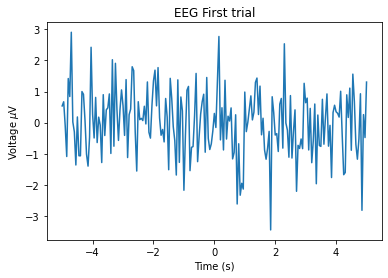

In [4]:
t_series = np.arange(-100,101)/20

plt.plot(t_series, eeg.loc[:,0])
plt.xlabel('Time (s)')
plt.ylabel('Voltage $\mu$V')
plt.title('EEG First trial')
eeg.loc[t_series==1,0]

**b. Plot is shown above. Voltage is 0.98 $\mu$V at t = 1 s.**

120   -0.255491
dtype: float64

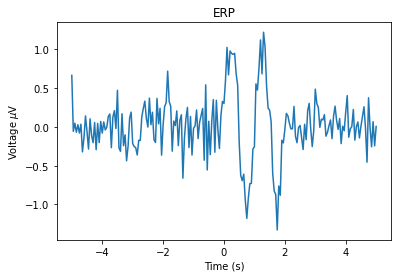

In [5]:
erp = eeg.mean(axis=1)
plt.plot(t_series, erp)
plt.xlabel('Time (s)')
plt.ylabel('Voltage $\mu$V')
plt.title('ERP')
erp[t_series==1]

**c. The ERP value is -0.26 $\mu$V at t = 1 s.**

In [6]:
statistic, pvalue = stats.ttest_1samp(eeg.loc[t_series=0,:], 0)
statistic, pvalue

(-1.105648339233261, 0.28268287719997626)

**d. The p-value is 0.28, the t statistic is -1.11.**

Text(0.5, 1.0, 'p-values')

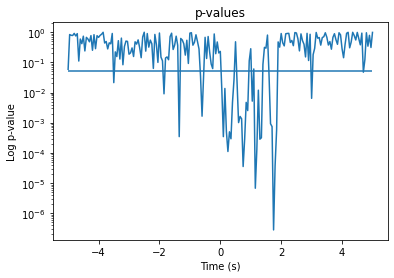

In [7]:
pvalue_all = np.zeros(np.shape(eeg)[0])

for i in np.arange(np.shape(eeg)[0]):
    _, pvalue_all[i] = stats.ttest_1samp(eeg.loc[i,:], 0)

plt.plot(t_series, pvalue_all)
plt.yscale('log')
plt.hlines(0.05, t_series[0], t_series[-1])
plt.xlabel('Time (s)')
plt.ylabel('Log p-value')
plt.title('p-values')

**e. Plot is shown above.**

In [8]:
np.sum(pvalue_all[t_series<0]<0.05)

6

**f. 6 of the 100 pre-stimulus points have a significant ERP.**

In [9]:
np.sum(pvalue_all[t_series>0]<0.05)

31

**g. 31 of the 100 post-stimulus points have a significant ERP.**

**h. Both are greater than the number of "false positives" you would expect from the null hypothesis. This result is unexpected for the 100 pre-stimulus time points because no significant ERP is expected to occur before the stimulus onset; this is expected for the 100 post-stimulus time points because a significant ERP is expected after the stimulus.**

In [10]:
alpha_corrected = 0.05/np.shape(eeg)[0]
alpha_corrected

0.0002487562189054727

**i. The Bonferroni-corrected threshold is 0.00025.**

In [11]:
print(np.sum(pvalue_all[t_series<0]<alpha_corrected))
print(np.sum(pvalue_all[t_series>0]<alpha_corrected))

0
6


**j. 0 and 6 time points are significant pre- and post-stimulus.**

In [12]:
eeg

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.53767,1.833900,-2.258800,0.86217,0.31877,-1.307700,-0.433590,0.34262,3.578400,2.76940,-1.34990,3.034900,0.72540,-0.063055,0.714740,-0.20497,-0.124140,1.48970,1.409000,1.417200
1,0.67150,-1.207500,0.717240,1.63020,0.48889,1.034700,0.726890,-0.30344,0.293870,-0.78728,0.88840,-1.147100,-1.06890,-0.809500,-2.944300,1.43840,0.325190,-0.75493,1.370300,-1.711500
2,-0.10224,-0.241450,0.319210,0.31286,-0.86488,-0.030051,-0.164880,0.62771,1.093300,1.10930,-0.86365,0.077359,-1.21410,-1.113500,-0.006849,1.53260,-0.769670,0.37138,-0.225580,1.117400
3,-1.08910,0.032557,0.552530,1.10060,1.54420,0.085931,-1.491600,-0.74230,-1.061600,2.35050,-0.61560,0.748080,-0.19242,0.888610,-0.764850,-1.40230,-1.422400,0.48819,-0.177380,-0.196050
4,1.41930,0.291580,0.197810,1.58770,-0.80447,0.696620,0.835090,-0.24372,0.215670,-1.16580,-1.14800,0.104870,0.72225,2.585500,-0.666890,0.18733,-0.082494,-1.93300,-0.438970,-1.794700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.92949,1.793000,-1.183200,-0.11118,-0.65677,1.879700,-0.896080,1.33150,-0.624570,0.77668,-1.32430,1.500300,-2.20290,0.322510,0.421000,-0.82070,-0.966460,0.60935,-1.036200,-0.028238
197,-2.81980,-2.081000,-0.044753,1.11800,-1.64950,0.678670,0.494320,-0.58847,-0.023925,2.19130,-1.40060,0.480100,0.20755,0.322080,-0.005881,0.28139,-0.251340,-1.69350,-0.584020,0.234440
198,0.25879,0.603660,2.221000,-1.65410,0.68041,0.135830,-0.037987,-0.69314,-0.127530,0.68036,0.42621,-1.605700,0.90621,0.249510,1.894200,-1.11240,-0.722040,-1.75220,0.003612,0.995140
199,-0.47897,-0.519100,-0.294660,-0.16055,1.02350,0.015895,-0.482660,0.63467,-1.364400,0.59862,-0.20650,2.139400,-0.64881,0.423590,0.117870,-1.08080,0.875530,-2.22630,-1.946100,-1.309600


In [25]:
np.max(eeg[t_series>0])-np.min(eeg[t_series>0])

0     6.2217
1     5.1229
2     4.9922
3     5.5246
4     4.7512
5     5.2581
6     5.3847
7     4.4991
8     5.4973
9     5.1089
10    5.8156
11    4.9229
12    5.8165
13    5.5504
14    5.2163
15    5.9123
16    5.1940
17    5.3130
18    6.5630
19    5.6421
dtype: float64

In [26]:
np.sum(pvalue_all<0.05)

37